In [1]:
import torch
# import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms



In [13]:
# Writer will output to ./runs/ directory by default
writer = SummaryWriter()

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('mnist_train', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
model = torchvision.models.resnet50(False)
# Have ResNet model take in grayscale rather than RGB
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
images, labels = next(iter(trainloader))

grid = torchvision.utils.make_grid(images)
writer.add_image('images', grid, 0)
writer.add_graph(model, images)
writer.close()

In [ ]:
# writer.add_video()

In [7]:
# video_array.shape

(1, 3, 500, 200, 300)

In [14]:
video = torch.rand(1, 10, 3, 224, 224)

In [15]:
writer.add_video("Video", video, global_step=None, fps=4, walltime=None)

The temporary file used by moviepy cannot be deleted.


runs\Jan17_15-12-53_DESKTOP-0CQD8DO


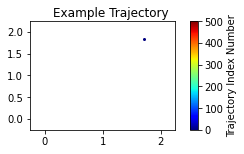

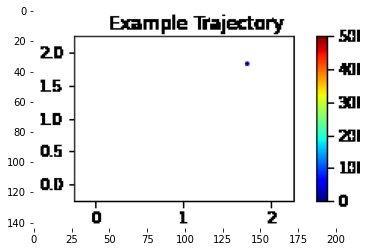

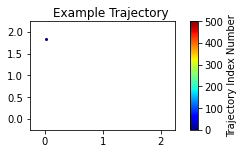

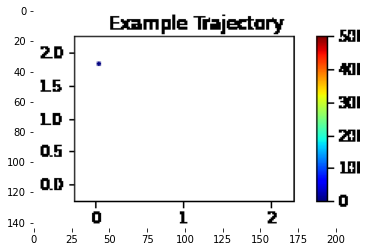

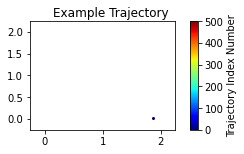

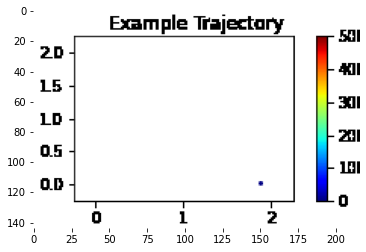

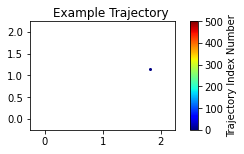

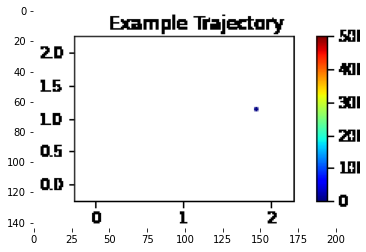

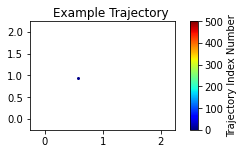

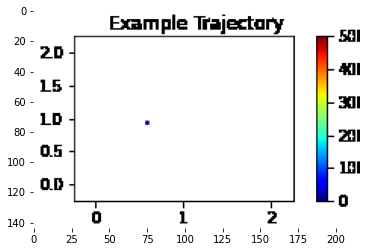

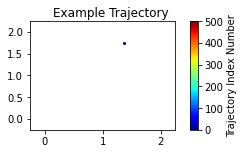

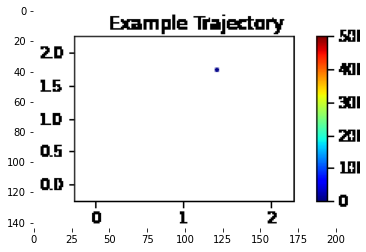

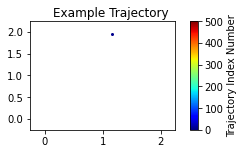

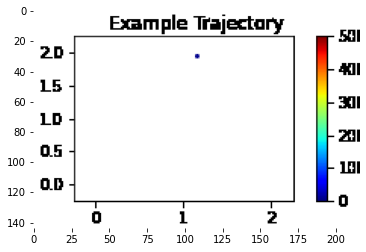

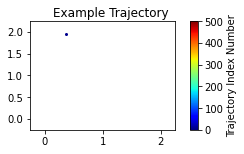

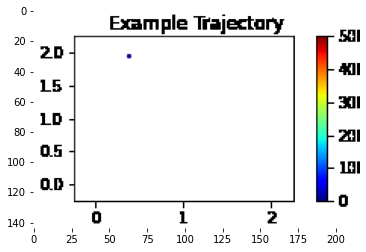

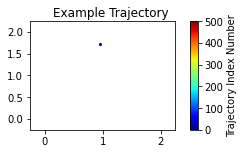

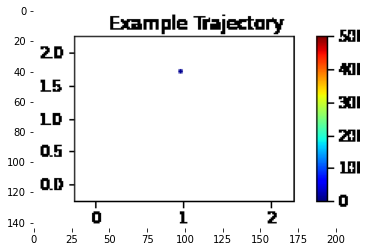

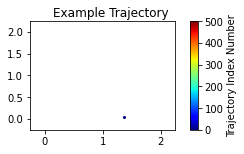

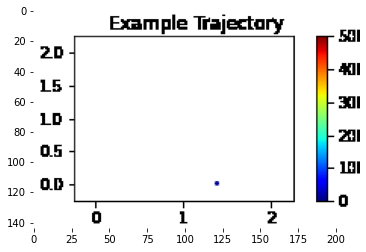

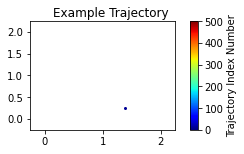

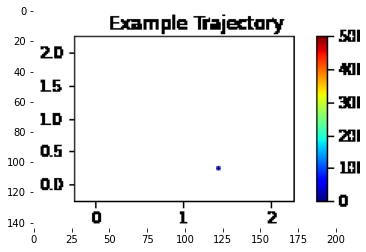

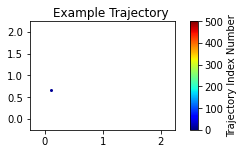

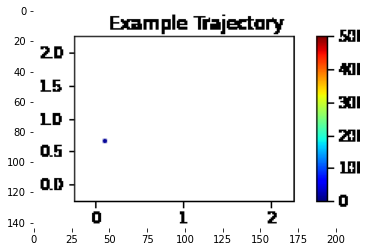

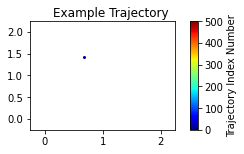

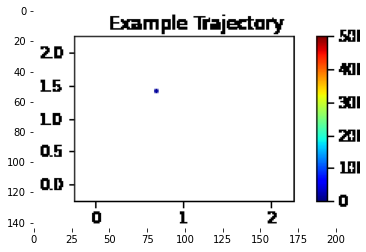

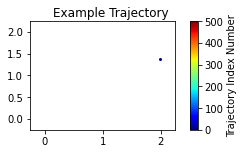

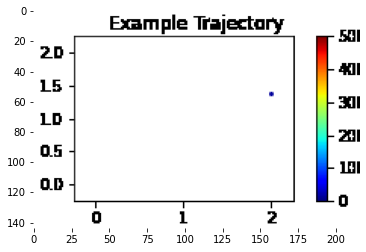

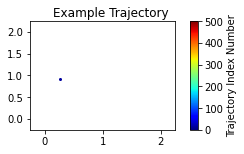

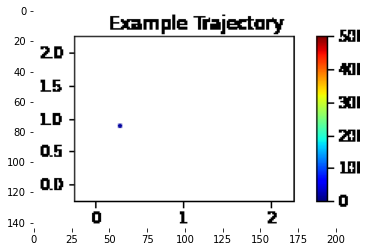

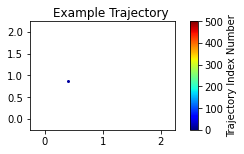

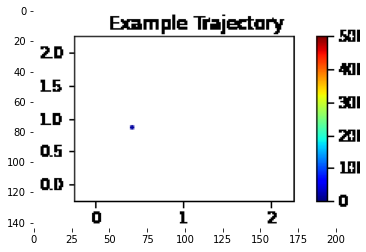

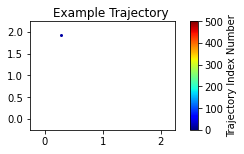

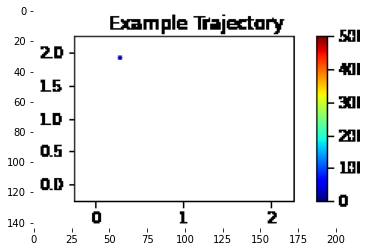

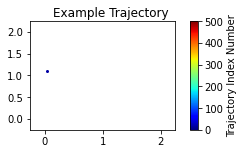

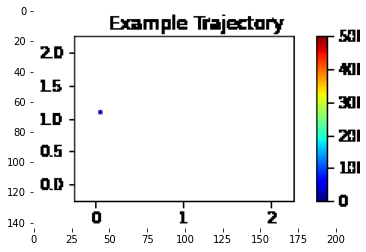

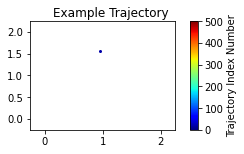

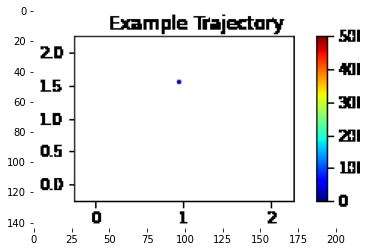

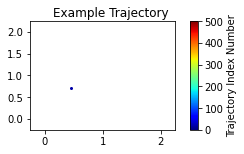

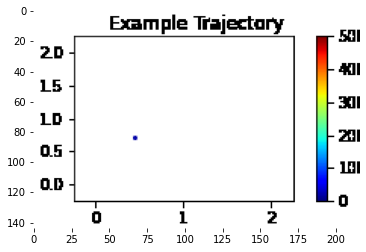

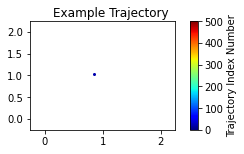

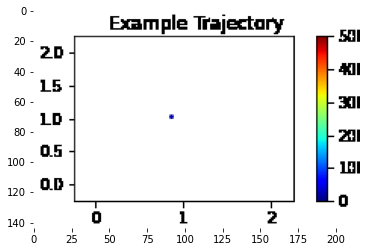

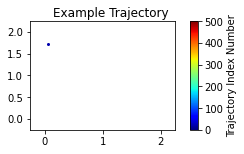

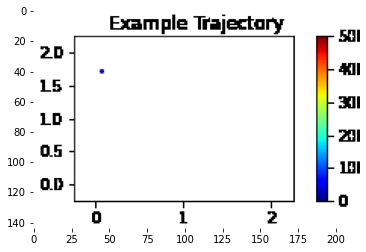

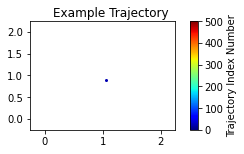

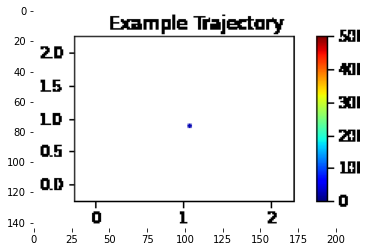

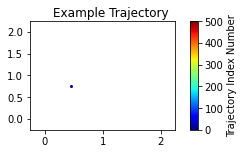

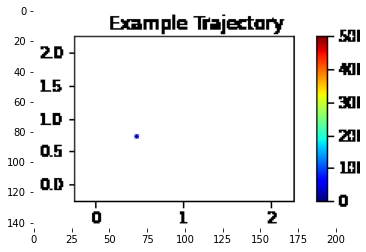

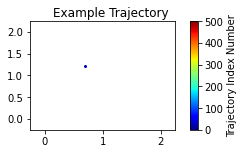

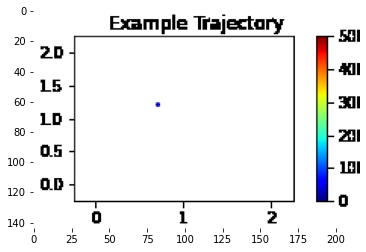

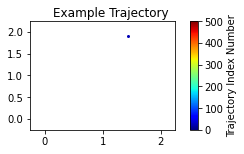

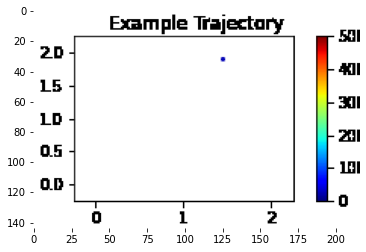

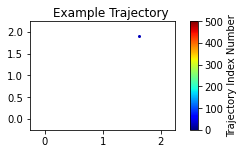

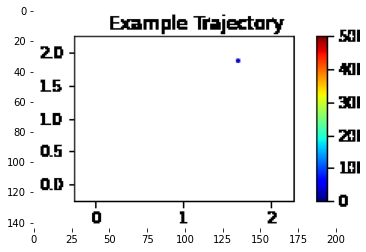

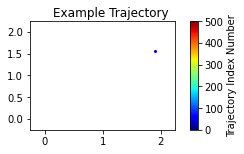

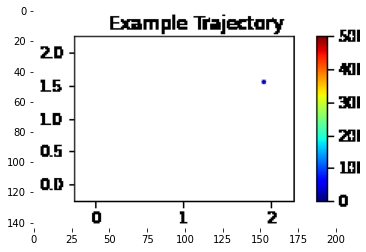

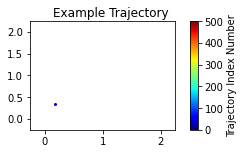

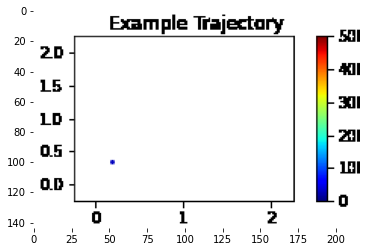

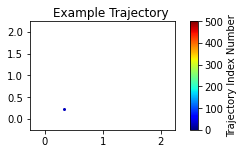

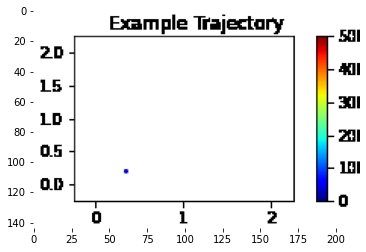

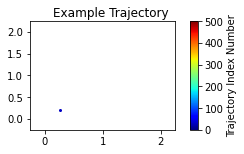

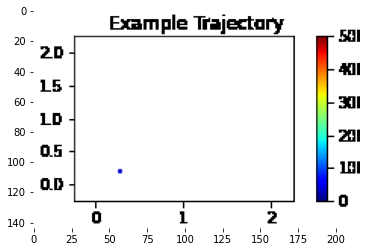

KeyboardInterrupt: 

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.tensorboard import SummaryWriter


tensorboard_writer = SummaryWriter()
print(tensorboard_writer.get_logdir())


def fig2data(fig):

    # draw the renderer
    fig.canvas.draw()

    # Get the RGB buffer from the figure
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return data


size = 500
x = np.random.uniform(0, 2., size=500)
y = np.random.uniform(0, 2., size=500)
trajectory_len = len(x)
trajectory_indices = np.arange(trajectory_len)
width, height = 3, 2

# tensorboard takes video of shape (B,C,T,H,W)
video_array = np.zeros(
    shape=(1, 3, trajectory_len, height*100, width*100),
    dtype=np.uint8)

for trajectory_idx in trajectory_indices:

    fig, axes = plt.subplots(
        1,
        2,
        figsize=(width, height),
        gridspec_kw={'width_ratios': [1, 0.05]})
    fig.suptitle('Example Trajectory')
    # plot the first trajectory
    sc = axes[0].scatter(
        x=[x[trajectory_idx]],
        y=[y[trajectory_idx]],
        c=[trajectory_indices[trajectory_idx]],
        s=4,
        vmin=0,
        vmax=trajectory_len,
        cmap=plt.cm.jet)

    axes[0].set_xlim(-0.25, 2.25)
    axes[0].set_ylim(-0.25, 2.25)

    colorbar = fig.colorbar(sc, cax=axes[1])
    colorbar.set_label('Trajectory Index Number')

    # extract numpy array of figure
    data = fig2data(fig)

#     # UNCOMMENT IF YOU WANT TO VERIFY THAT THE NUMPY ARRAY WAS CORRECTLY EXTRACTED
#     plt.show()
#     fig2 = plt.figure()
#     ax2 = fig2.add_subplot(111, frameon=False)
#     ax2.imshow(data)
#     plt.show()

    # close figure to save memory
    plt.close(fig=fig)

#     video_array[0, :, trajectory_idx, :, :] = np.transpose(data, (2, 0, 1))

# tensorboard takes video_array of shape (B,C,T,H,W)


In [38]:
import cv2

# read video from file
cap = cv2.VideoCapture(r"C:\Users\Admin\Dropbox\PC\Downloads\WhatsApp Video 2023-01-17 at 3.33.21 PM.mp4")

# read from webcam
# cap = cv2.VideoCapture(0) # 0 for default cam

# read from network
# cap = cv2.VideoCapture('IP_HERE')

In [39]:
ret, frame = cap.read()

In [40]:
frame.shape

(640, 352, 3)

In [44]:
from moviepy.video.io.VideoFileClip import VideoFileClip

# Open a video file
clip = VideoFileClip(r"C:\Users\Admin\Dropbox\PC\Downloads\WhatsApp Video 2023-01-17 at 3.33.21 PM.mp4")

# Print the video's duration
print("Duration:", clip.duration)

# Print the video's fps
print("FPS:", clip.fps)

# Print the video's size
print("Size:", clip.size)

# Close the video file
clip.close()


Duration: 12.76
FPS: 30.0
Size: [640, 352]


In [52]:
cl = clip.to_RGB()

In [ ]:
N, T, C, H, W

In [55]:
import ffmpeg

# # Open a video file
# probe = ffmpeg.probe('path/to/video.mp4')

# # Print the video's duration
# print("Duration:",probe['format']['duration'])

# # Print the video's fps
# print("FPS:",probe['streams'][0]['r_frame_rate'])

# # Print the video's size
# print("Size:",probe['streams'][0]['width'],probe['streams'][0]['height'])


In [57]:
from matplotlib import animation

In [60]:
anim = animation.FuncAnimation(figure, func=update_figure, fargs=(bar_rects, iteration), frames=generator, interval=100, repeat=False)

NameError: name 'figure' is not defined

In [59]:
f = r"C:\Users\Admin\Dropbox\PC\Downloads\WhatsApp Video 2023-01-17 at 3.33.21 PM.mp4"
writervideo = animation.FFMpegWriter(fps=60) 
anim.save(f, writer=writervideo)

AttributeError: module 'matplotlib.animation' has no attribute 'save'

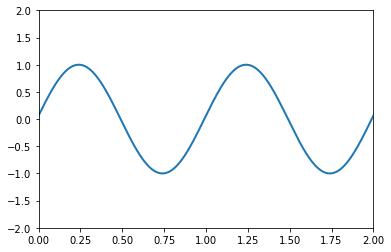

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
plt.rcParams['animation.ffmpeg_path']='‪C:\\FFmpeg\bin\ffmpeg.exe'

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5. 
writergif = animation.PillowWriter(fps=30)
anim.save('filename.gif',writer=writergif)

plt.show()